# Problem Statement
There are sales figures according to TV, Radio and Newspaper ads.
From here, the Sales Column is the target, i.e. y=df['Sales']. You will look for an answer to the question of how much my sales figures will increase if I invest in TV, radio and newspaper separately and you will find which advertising method is more successful. You will visualize the data you allocated as a test and the data you predicted in the same graph with a line chart.


## Data Set Information
* TV
* Radio
* Newspaper
* Sales


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## Load the dataset

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


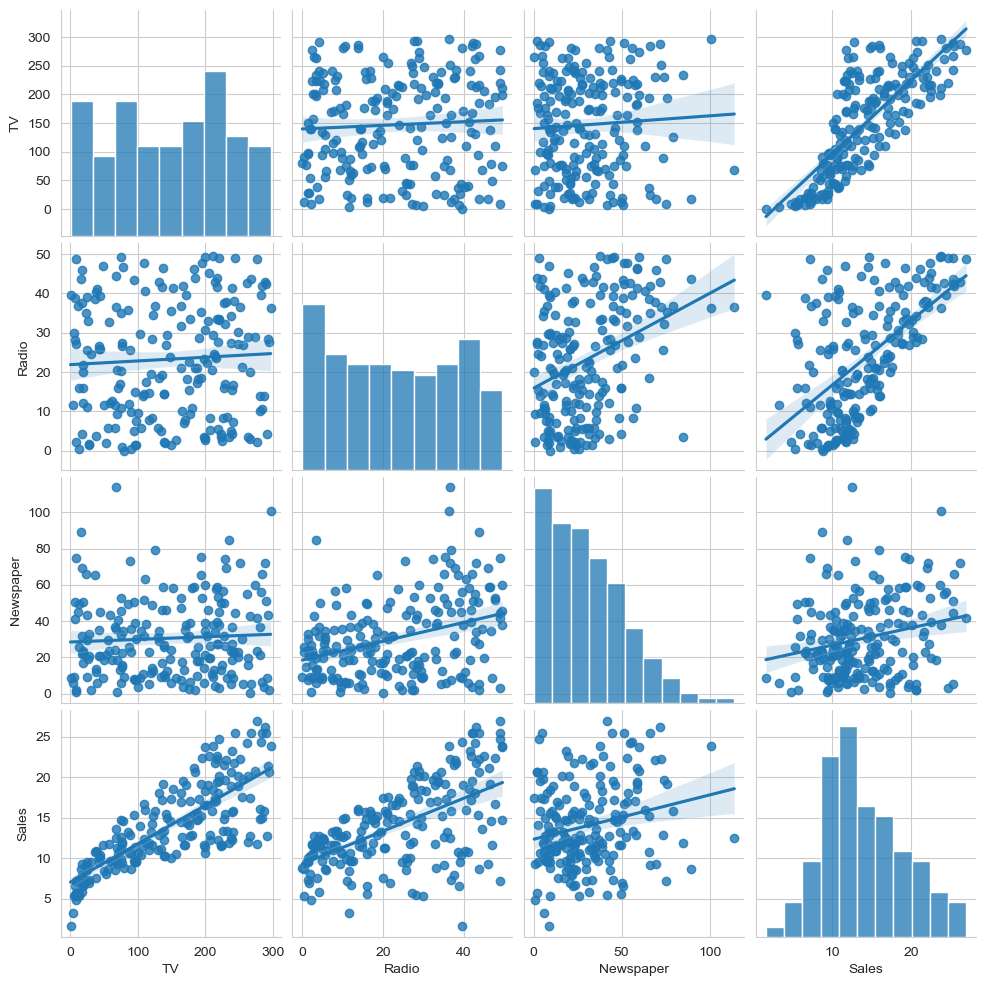

In [6]:
sns.pairplot(df, kind="reg");

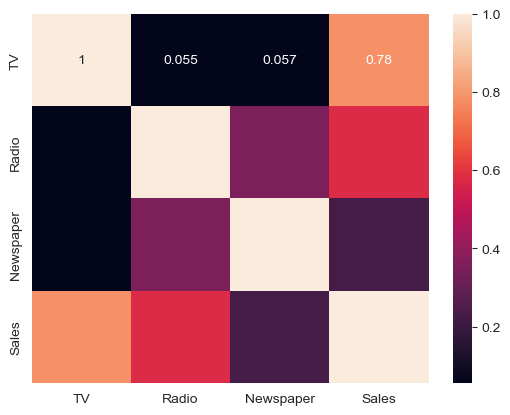

In [7]:
sns.heatmap(df.corr(), annot=True);

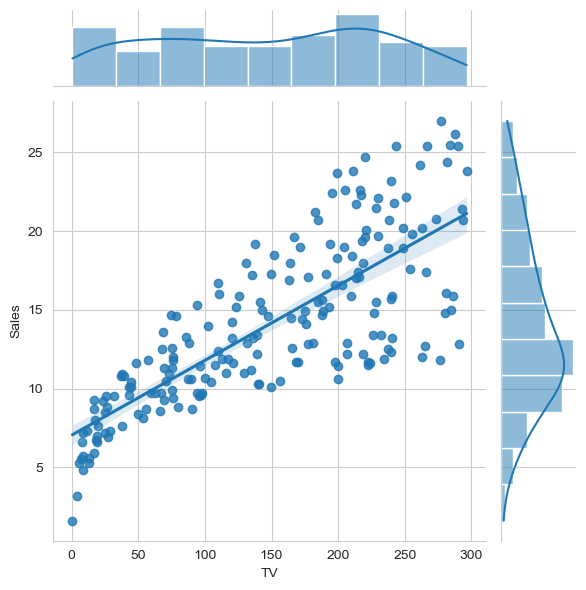

In [8]:
sns.jointplot(x="TV", y="Sales", data=df, kind="reg");

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

## Model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE (Mean Squared Error)       : ", mse)
print("RMSE (Root Mean Squared Error) : ", np.sqrt(mse))
print("R2 Score                      : ", r2)


MSE (Mean Squared Error)       :  3.1740973539761046
RMSE (Root Mean Squared Error) :  1.7815996615334502
R2 Score                      :  0.899438024100912


## Visualization

In [12]:
import matplotlib.pyplot as plt

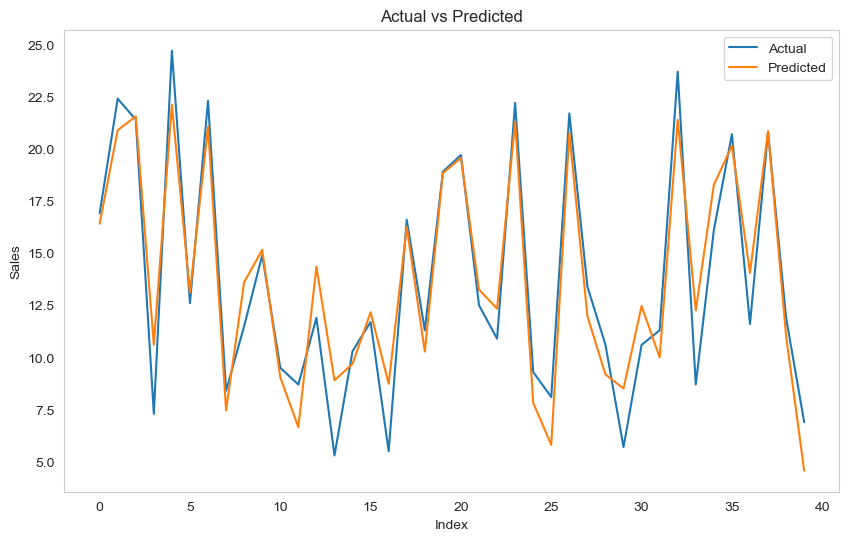

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

## Problem solution
Which advertising method is more successful?

In [14]:
coefficients = lr.coef_
print(f"TV Coefficient      : {coefficients[0]:.2f}")
print(f"Radio Coefficient   : {coefficients[1]:.2f}")
print(f"Newspaper Coefficient: {coefficients[2]:.2f}")
print("-"*30)
intercept = lr.intercept_
print(f"Intercept: {intercept:.2f}")
print("-"*30)
features = x.columns
print("Features: ", features)
print("-"*30)
coef_df = pd.DataFrame({"Features": features, "Coefficients": coefficients})
coef_df

TV Coefficient      : 0.04
Radio Coefficient   : 0.19
Newspaper Coefficient: 0.00
------------------------------
Intercept: 2.98
------------------------------
Features:  Index(['TV', 'Radio', 'Newspaper'], dtype='object')
------------------------------


,Features,Coefficients
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


## Sales Prediction

In [15]:
# TV: 100, Radio: 25, Newspaper: 25
tv_investment = 100
radio_investment = 25
newspaper_investment = 25

predicted_sale = (intercept +
                  coefficients[0] * tv_investment +
                  coefficients[1] * radio_investment +
                  coefficients[2] * newspaper_investment)
print(f"Predicted Sales: {predicted_sale:.2f}")


Predicted Sales: 12.25


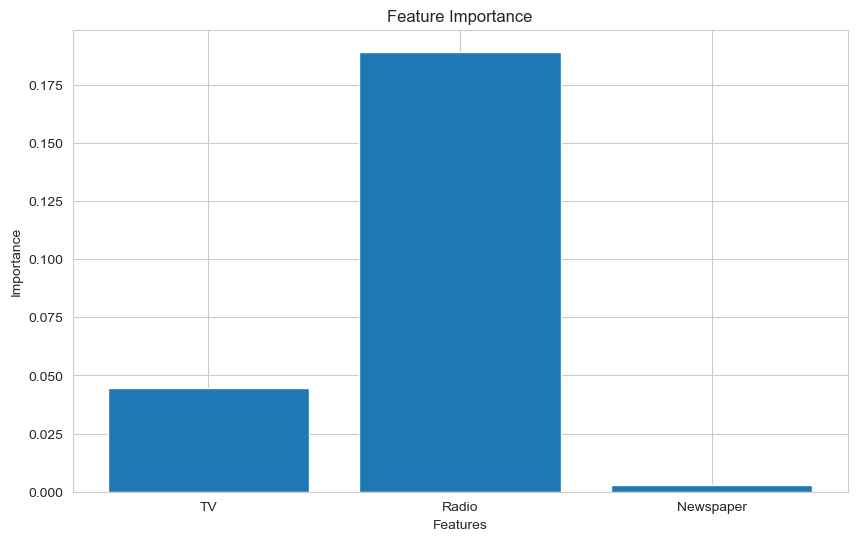

In [17]:
# let's generate feauter importance chart

importance = lr.coef_
plt.figure(figsize=(10, 6))
plt.bar(x.columns, importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


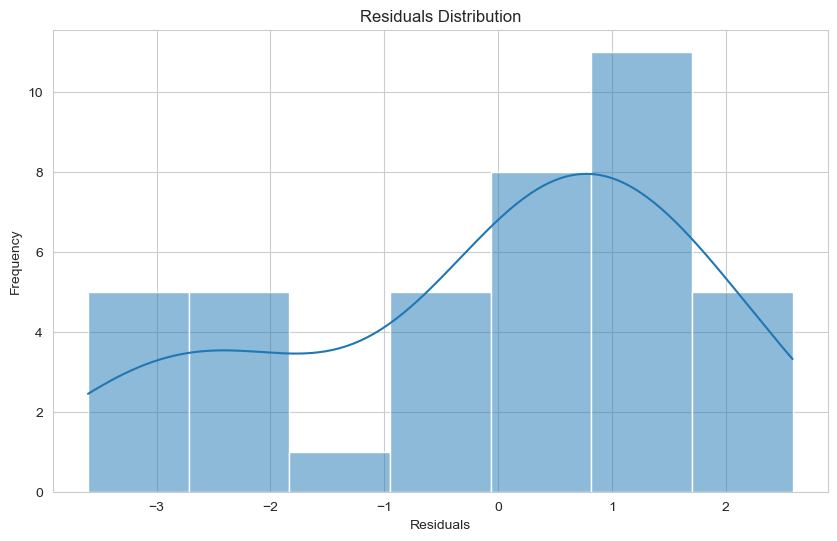

In [18]:
# let's generate a residual follow normal distribution chart

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()